### Copyright © 2021, Chloe Wang

# Library Imports

In [5]:
# basic libraries/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries/functions
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

# metrics library/function
from sklearn.metrics import silhouette_score

# model libraries/functions
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

# Importing Relevant Files

In [6]:
# loading the data
df = pd.read_csv('pc6_sdg_goals.csv')

In [7]:
# previewing the dataset's first 10 rows
df.head(10)

,country,id,indexreg,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
0,Afghanistan,AFG,E. Europe & C. Asia,38928341.0,NaN,NaN,29.80,40.90,9.5,5.5,...,11.118,13.500,NaN,45.101,1.663,0.369,NaN,6.141,7.1,4.751
1,Angola,AGO,Africa,32866268.0,21.03,42.85,25.00,37.60,4.9,8.2,...,6.886,14.339,45.075,57.966,0.573,1.268,54.97,28.367,4.8,5.121
2,Albania,ALB,E. Europe & C. Asia,2877800.0,0.35,4.35,6.20,23.10,9.4,21.7,...,12.331,71.847,41.682,92.357,1.769,1.487,56.66,76.110,2.3,6.732
3,Andorra,AND,E. Europe & C. Asia,77265.0,NaN,NaN,1.17,2.58,0.7,25.6,...,NaN,91.567,NaN,99.000,1.738,6.156,NaN,26.082,1.2,8.350
4,United Arab Emirates,ARE,MENA,9890400.0,NaN,NaN,2.60,2.58,0.7,31.7,...,2.348,98.450,32.510,NaN,1.797,23.505,68.27,57.903,0.5,NaN
5,Argentina,ARG,LAC,45195777.0,0.71,2.88,4.60,8.20,1.2,28.3,...,9.789,74.295,46.673,97.979,1.195,4.575,81.93,32.405,5.2,11.164
6,Armenia,ARM,E. Europe & C. Asia,2963234.0,0.72,6.51,4.30,9.40,4.2,20.2,...,16.990,64.745,47.464,99.000,0.729,1.973,NaN,21.547,2.4,4.391
7,Antigua and Barbuda,ATG,LAC,97928.0,NaN,NaN,1.17,2.58,0.7,18.9,...,NaN,76.000,NaN,NaN,3.306,5.900,61.63,14.867,10.3,5.754
8,Australia,AUS,OECD,25499881.0,0.52,0.63,2.50,2.00,0.0,29.0,...,5.268,86.545,36.925,92.372,1.716,14.765,80.26,52.671,0.8,11.591
9,Austria,AUT,OECD,9006400.0,0.44,0.52,2.50,2.58,0.7,20.1,...,4.674,87.479,31.967,NaN,2.597,7.098,NaN,66.634,0.7,13.069


In [8]:
# previewing the last 10 rows
df.tail(10)

,country,id,indexreg,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
194,Eastern Europe and Central Asia,_E_Euro_Asia,NaN,NaN,1.297,4.810,6.177,19.467,5.570,20.147,...,6.715,64.825,40.378,88.017,1.456,6.946,NaN,28.468,5.838,6.903
195,East and South Asia,_E_S_Asia,NaN,NaN,1.576,14.708,11.961,25.972,11.020,5.499,...,4.430,42.381,42.636,71.666,0.911,3.447,37.170,33.583,2.149,4.526
196,Latin America and the Caribbean,_LAC,NaN,NaN,6.046,14.083,7.407,11.699,1.719,22.868,...,9.145,64.632,51.966,94.633,1.108,2.422,60.941,40.875,24.142,9.372
197,Middle East and North Africa,_MENA,NaN,NaN,NaN,NaN,9.586,16.933,7.077,28.830,...,10.499,60.738,42.827,91.034,1.157,5.894,53.509,33.845,3.113,6.888
198,Oceania,_Oceania,NaN,NaN,24.134,45.816,5.624,43.128,12.673,23.657,...,2.620,15.857,51.326,61.206,2.356,0.990,65.799,8.471,8.524,10.302
199,OECD members,_OECD,NaN,NaN,0.571,1.742,2.615,4.195,0.948,25.346,...,5.355,84.078,41.296,98.615,1.835,9.136,62.013,54.977,4.619,12.077
200,High-income Countries,_HIC,NaN,NaN,0.488,0.679,2.686,3.178,1.264,24.793,...,4.940,87.356,39.034,98.663,1.908,10.547,62.540,59.799,2.294,12.615
201,Upper-middle-income Countries,_UMIC,NaN,NaN,1.758,5.201,7.230,10.031,2.425,14.510,...,6.497,60.501,44.687,93.419,0.970,5.857,46.408,36.912,7.438,8.129
202,Lower-middle-income Countries,_LMIC,NaN,NaN,7.212,27.475,14.023,35.588,14.626,7.421,...,5.507,35.937,44.672,58.888,0.981,1.438,39.058,35.127,4.022,4.825
203,Low-income Countries,_LIC,NaN,NaN,44.649,70.683,27.652,37.052,8.724,7.573,...,4.437,15.963,41.878,67.030,1.258,0.296,46.755,41.408,7.179,5.098


The last 10 rows contain aggregates of regions for the countries shown in this dataset.

In [9]:
# looking at the number of observations and features
df.shape

(204, 36)

In [10]:
# looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          204 non-null    object 
 1   id               204 non-null    object 
 2   indexreg         193 non-null    object 
 3   pop_2020         193 non-null    float64
 4   sdg1_wpc         170 non-null    float64
 5   sdg1_320pov      170 non-null    float64
 6   sdg2_undernsh    184 non-null    float64
 7   sdg2_stunting    195 non-null    float64
 8   sdg2_wasting     195 non-null    float64
 9   sdg2_obesity     199 non-null    float64
 10  sdg2_crlyld      185 non-null    float64
 11  sdg3_matmort     194 non-null    float64
 12  sdg3_neonat      203 non-null    float64
 13  sdg3_u5mort      203 non-null    float64
 14  sdg3_tb          203 non-null    float64
 15  sdg3_lifee       194 non-null    float64
 16  sdg3_fertility   194 non-null    float64
 17  sdg3_births     

In [11]:
# summary statistics
df.describe()

,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
count,1.930000e+02,170.000000,170.000000,184.000000,195.000000,195.000000,199.000000,185.000000,194.000000,203.000000,...,189.000000,204.000000,170.000000,179.000000,197.000000,204.000000,160.000000,199.000000,202.000000,187.000000
mean,4.015560e+07,12.453712,23.103753,10.594022,17.775579,4.915995,19.535221,3.583514,160.528149,12.825143,...,6.918249,53.968980,42.965824,82.663346,1.600827,4.408858,54.917056,43.592618,7.323965,8.127273
std,1.482541e+08,19.773362,28.139615,11.598817,14.302141,4.655617,10.825154,3.093744,229.973094,10.460834,...,5.089565,28.632006,8.344765,21.332984,1.443161,5.718770,13.832563,26.316050,10.368911,3.783186
min,1.083400e+04,0.000000,0.000000,1.170000,1.300000,0.000000,2.100000,0.168000,2.000000,0.900000,...,0.091000,0.000000,27.377000,7.778000,0.195000,0.041000,19.560000,0.000000,0.200000,1.000000
25%,2.078932e+06,0.240000,0.760000,2.500000,3.686500,1.000000,9.200000,1.601000,13.250000,3.650000,...,3.473000,27.383500,36.654750,74.084000,0.938000,0.792250,45.487500,23.990000,1.500000,5.591500
50%,8.947027e+06,1.405000,9.325000,6.200000,13.400000,3.500000,20.600000,3.154000,58.500000,9.600000,...,5.363000,57.568500,42.777500,92.574000,1.273000,2.336500,56.500000,39.539000,3.700000,7.564000
75%,2.913681e+07,19.542500,37.450000,13.400000,28.200000,7.150000,25.323000,4.498000,192.750000,20.500000,...,9.145000,79.139500,49.002750,98.770500,1.830000,5.892500,62.525000,65.917000,8.493000,10.016500
max,1.439324e+09,80.010000,94.010000,59.600000,55.900000,22.700000,61.000000,26.110000,1150.000000,42.000000,...,28.181000,99.653000,67.338000,99.000000,16.219000,44.041000,93.980000,99.997000,61.800000,23.862000


In [12]:
# missing values
df.isna().sum()

country             0
id                  0
indexreg           11
pop_2020           11
sdg1_wpc           34
sdg1_320pov        34
sdg2_undernsh      20
sdg2_stunting       9
sdg2_wasting        9
sdg2_obesity        5
sdg2_crlyld        19
sdg3_matmort       10
sdg3_neonat         1
sdg3_u5mort         1
sdg3_tb             1
sdg3_lifee         10
sdg3_fertility     10
sdg3_births        10
sdg3_vac            1
sdg4_primary       13
sdg4_literacy      41
sdg5_familypl      13
sdg6_water          0
sdg6_sanita         0
sdg7_elecac         0
sdg8_slavery       44
sdg8_unemp         15
sdg9_intuse         0
sdg10_adjgini      34
sdg11_pipedwat     25
sdg12_msw           7
sdg13_co2pc         0
sdg14_cleanwat     44
sdg15_cpta          5
sdg16_homicides     2
sdg17_govex        17
dtype: int64

In [13]:
# looking at the observations without indexreg
df[df['indexreg'].isna()]

,country,id,indexreg,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
193,Sub-Saharan Africa,_Africa,NaN,NaN,40.170,65.071,21.399,35.915,8.173,8.865,...,6.554,25.071,47.228,59.172,1.036,0.807,44.316,52.064,9.123,5.665
194,Eastern Europe and Central Asia,_E_Euro_Asia,NaN,NaN,1.297,4.810,6.177,19.467,5.570,20.147,...,6.715,64.825,40.378,88.017,1.456,6.946,NaN,28.468,5.838,6.903
195,East and South Asia,_E_S_Asia,NaN,NaN,1.576,14.708,11.961,25.972,11.020,5.499,...,4.430,42.381,42.636,71.666,0.911,3.447,37.170,33.583,2.149,4.526
196,Latin America and the Caribbean,_LAC,NaN,NaN,6.046,14.083,7.407,11.699,1.719,22.868,...,9.145,64.632,51.966,94.633,1.108,2.422,60.941,40.875,24.142,9.372
197,Middle East and North Africa,_MENA,NaN,NaN,NaN,NaN,9.586,16.933,7.077,28.830,...,10.499,60.738,42.827,91.034,1.157,5.894,53.509,33.845,3.113,6.888
198,Oceania,_Oceania,NaN,NaN,24.134,45.816,5.624,43.128,12.673,23.657,...,2.620,15.857,51.326,61.206,2.356,0.990,65.799,8.471,8.524,10.302
199,OECD members,_OECD,NaN,NaN,0.571,1.742,2.615,4.195,0.948,25.346,...,5.355,84.078,41.296,98.615,1.835,9.136,62.013,54.977,4.619,12.077
200,High-income Countries,_HIC,NaN,NaN,0.488,0.679,2.686,3.178,1.264,24.793,...,4.940,87.356,39.034,98.663,1.908,10.547,62.540,59.799,2.294,12.615
201,Upper-middle-income Countries,_UMIC,NaN,NaN,1.758,5.201,7.230,10.031,2.425,14.510,...,6.497,60.501,44.687,93.419,0.970,5.857,46.408,36.912,7.438,8.129
202,Lower-middle-income Countries,_LMIC,NaN,NaN,7.212,27.475,14.023,35.588,14.626,7.421,...,5.507,35.937,44.672,58.888,0.981,1.438,39.058,35.127,4.022,4.825


The observations without `indexreg` information are aggregates of countries, we should separate these from the rest of the data.

In [14]:
# creating numerical and categorical column lists
cat_list = []
num_list = []

for col in df.columns:
  if df[col].dtypes == 'object':
    cat_list.append(col)
  else:
    num_list.append(col)

print(f'Categorical Features: {cat_list}')
print(f'Numerical Features: {num_list}')

Categorical Features: ['country', 'id', 'indexreg']
Numerical Features: ['pop_2020', 'sdg1_wpc', 'sdg1_320pov', 'sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity', 'sdg2_crlyld', 'sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac', 'sdg4_primary', 'sdg4_literacy', 'sdg5_familypl', 'sdg6_water', 'sdg6_sanita', 'sdg7_elecac', 'sdg8_slavery', 'sdg8_unemp', 'sdg9_intuse', 'sdg10_adjgini', 'sdg11_pipedwat', 'sdg12_msw', 'sdg13_co2pc', 'sdg14_cleanwat', 'sdg15_cpta', 'sdg16_homicides', 'sdg17_govex']


In [15]:
# looking at only the countries and not the aggregates
subset_df = df[df['indexreg'].notna()]

subset_df.tail(10)

,country,id,indexreg,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
183,Uzbekistan,UZB,E. Europe & C. Asia,33469199.0,6.79,28.66,6.3,19.6,4.5,16.6,...,5.917,55.200,44.836,88.082,0.671,3.254,NaN,15.467,1.1,8.590
184,St. Vincent and the Grenadines,VCT,LAC,110947.0,NaN,NaN,5.7,NaN,NaN,23.7,...,18.881,22.394,NaN,NaN,1.503,1.994,59.31,42.831,36.5,8.496
185,"Venezuela, RB",VEN,LAC,28435943.0,36.58,59.73,21.2,13.4,4.1,25.6,...,8.801,72.000,55.329,NaN,0.938,5.306,62.01,66.465,56.3,8.896
186,Vietnam,VNM,East & South Asia,97338583.0,0.63,3.54,9.3,24.6,6.4,2.1,...,2.013,70.350,35.621,81.001,0.757,1.797,45.23,41.064,1.5,7.029
187,Vanuatu,VUT,Oceania,307150.0,10.57,33.58,7.2,28.5,4.4,25.2,...,4.385,25.720,37.603,78.468,2.698,0.662,61.86,6.387,2.1,7.569
188,Samoa,WSM,Oceania,198410.0,0.20,4.09,2.7,4.7,3.7,47.3,...,8.359,33.611,43.267,90.069,2.081,1.387,92.17,37.082,3.1,8.306
189,"Yemen, Rep.",YEM,MENA,29825968.0,NaN,NaN,38.9,46.5,16.3,17.1,...,12.910,26.718,49.027,77.049,1.251,0.837,53.55,31.079,6.7,6.754
190,South Africa,ZAF,Africa,59308690.0,24.45,34.14,6.2,27.4,2.5,28.3,...,28.181,56.167,67.338,98.317,1.328,9.139,55.58,30.700,35.9,10.300
191,Zambia,ZMB,Africa,18383956.0,53.61,72.09,46.7,40.0,6.3,8.1,...,11.425,14.300,62.669,68.186,0.932,0.222,NaN,48.361,5.3,5.462
192,Zimbabwe,ZWE,Africa,14862927.0,NaN,NaN,51.3,26.8,3.2,15.5,...,4.954,27.055,43.134,74.423,0.729,0.892,NaN,85.876,6.7,9.174


In [16]:
# number of missing features
subset_df['missing_values'] = subset_df.isna().sum(axis= 1)

<ipython-input-16-1973fc64421d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['missing_values'] = subset_df.isna().sum(axis= 1)


In [17]:
# looking at the quartiles for the number of missing features
subset_df['missing_values'].describe()

count    193.000000
mean       2.212435
std        3.372908
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       20.000000
Name: missing_values, dtype: float64

In [18]:
# 90th percentile for missing features
np.percentile(subset_df['missing_values'], 90)

5.800000000000011

In [19]:
# creating a subset to only deal with countries within the 90th percentile (exclude top 10%) for the number of missing values
df_90th = subset_df[subset_df['missing_values'] <= 5].reset_index(drop=True)

In [20]:
# the remaining number of missing values per feature
df_90th.isna().sum()

country             0
id                  0
indexreg            0
pop_2020            0
sdg1_wpc           13
sdg1_320pov        13
sdg2_undernsh      13
sdg2_stunting       3
sdg2_wasting        3
sdg2_obesity        2
sdg2_crlyld         5
sdg3_matmort        0
sdg3_neonat         0
sdg3_u5mort         0
sdg3_tb             0
sdg3_lifee          0
sdg3_fertility      0
sdg3_births         6
sdg3_vac            0
sdg4_primary       10
sdg4_literacy      28
sdg5_familypl       4
sdg6_water          0
sdg6_sanita         0
sdg7_elecac         0
sdg8_slavery       23
sdg8_unemp          0
sdg9_intuse         0
sdg10_adjgini      18
sdg11_pipedwat     12
sdg12_msw           7
sdg13_co2pc         0
sdg14_cleanwat     40
sdg15_cpta          1
sdg16_homicides     0
sdg17_govex        12
missing_values      0
dtype: int64

In [21]:
# creating function that creates dummy variables for the categorical columns
def get_dummies(df):
  '''
  This function takes the train/test dataset and creates dummy variables for the known categorical variables.
  '''
  # using pandas get dummies function to create dummy variables for each categorical item
  dummy_df = pd.get_dummies(df['indexreg'], drop_first=True)

  # saving dummy feature names to list
  dummy_features = list(dummy_df.columns)

  # merging original df w/ the new dummy variable columns
  new_df = df.merge(dummy_df, left_index=True, right_index=True)

  # return/output the new merged df and the dummy feature column names
  return new_df, dummy_features

In [22]:
# creating a dummy variable column for the indexreg feature
temp_df_90th, dummy_col = get_dummies(df_90th)

In [23]:
# previewing the new dummied variables/features for index region
temp_df_90th.head()

,country,id,indexreg,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg15_cpta,sdg16_homicides,sdg17_govex,missing_values,E. Europe & C. Asia,East & South Asia,LAC,MENA,OECD,Oceania
0,Afghanistan,AFG,E. Europe & C. Asia,38928341.0,NaN,NaN,29.8,40.90,9.5,5.5,...,6.141,7.1,4.751,5,1,0,0,0,0,0
1,Angola,AGO,Africa,32866268.0,21.03,42.85,25.0,37.60,4.9,8.2,...,28.367,4.8,5.121,0,0,0,0,0,0,0
2,Albania,ALB,E. Europe & C. Asia,2877800.0,0.35,4.35,6.2,23.10,9.4,21.7,...,76.110,2.3,6.732,0,1,0,0,0,0,0
3,United Arab Emirates,ARE,MENA,9890400.0,NaN,NaN,2.6,2.58,0.7,31.7,...,57.903,0.5,NaN,5,0,0,0,1,0,0
4,Argentina,ARG,LAC,45195777.0,0.71,2.88,4.6,8.20,1.2,28.3,...,32.405,5.2,11.164,0,0,0,1,0,0,0


Let's use the KNN Imputer function in sklearn to impute the missing values based on the observations nearest neighbours. We are assuming that the missing values should be imputed by the mean of the ones that are the most similar to it.

In [24]:
# KNN imputer only uses numerical values, let's remove the categorical ones for the time being
# dropping the country, id and indexreg column to leave only numerical and dummied columns
temp_df_90th = temp_df_90th.drop(['pop_2020', 'country', 'id', 'indexreg', 'missing_values'], axis=1)

In [25]:
# creating the imputer using the mean of the nearest 10 neighbors
imputer = KNNImputer(n_neighbors=10, weights="uniform")

# recreating the temp_df_90th dataframe with the new imputed values
temp_df_90th_imp = pd.DataFrame(imputer.fit_transform(temp_df_90th), columns=temp_df_90th.columns)
temp_df_90th_imp.head()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex,E. Europe & C. Asia,East & South Asia,LAC,MENA,OECD,Oceania
0,29.898,53.581,29.8,40.90,9.5,5.5,2.025,638.0,37.1,62.3,...,48.357,6.141,7.1,4.7510,1.0,0.0,0.0,0.0,0.0,0.0
1,21.030,42.850,25.0,37.60,4.9,8.2,0.905,241.0,28.5,77.2,...,54.970,28.367,4.8,5.1210,0.0,0.0,0.0,0.0,0.0,0.0
2,0.350,4.350,6.2,23.10,9.4,21.7,4.813,15.0,6.5,8.8,...,56.660,76.110,2.3,6.7320,1.0,0.0,0.0,0.0,0.0,0.0
3,0.360,0.483,2.6,2.58,0.7,31.7,23.576,3.0,4.0,7.6,...,68.270,57.903,0.5,11.9866,0.0,0.0,0.0,1.0,0.0,0.0
4,0.710,2.880,4.6,8.20,1.2,28.3,5.405,39.0,6.4,9.9,...,81.930,32.405,5.2,11.1640,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
# checking to see if the missing values are filled
temp_df_90th_imp.isna().sum()

sdg1_wpc               0
sdg1_320pov            0
sdg2_undernsh          0
sdg2_stunting          0
sdg2_wasting           0
sdg2_obesity           0
sdg2_crlyld            0
sdg3_matmort           0
sdg3_neonat            0
sdg3_u5mort            0
sdg3_tb                0
sdg3_lifee             0
sdg3_fertility         0
sdg3_births            0
sdg3_vac               0
sdg4_primary           0
sdg4_literacy          0
sdg5_familypl          0
sdg6_water             0
sdg6_sanita            0
sdg7_elecac            0
sdg8_slavery           0
sdg8_unemp             0
sdg9_intuse            0
sdg10_adjgini          0
sdg11_pipedwat         0
sdg12_msw              0
sdg13_co2pc            0
sdg14_cleanwat         0
sdg15_cpta             0
sdg16_homicides        0
sdg17_govex            0
E. Europe & C. Asia    0
East & South Asia      0
LAC                    0
MENA                   0
OECD                   0
Oceania                0
dtype: int64

In [27]:
# new dataframe with the imputed values and dummmied variables
training_df = pd.concat([df_90th.iloc[:, :4], temp_df_90th_imp], axis=1)
training_df.head()

,country,id,indexreg,pop_2020,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex,E. Europe & C. Asia,East & South Asia,LAC,MENA,OECD,Oceania
0,Afghanistan,AFG,E. Europe & C. Asia,38928341.0,29.898,53.581,29.8,40.90,9.5,5.5,...,48.357,6.141,7.1,4.7510,1.0,0.0,0.0,0.0,0.0,0.0
1,Angola,AGO,Africa,32866268.0,21.030,42.850,25.0,37.60,4.9,8.2,...,54.970,28.367,4.8,5.1210,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,ALB,E. Europe & C. Asia,2877800.0,0.350,4.350,6.2,23.10,9.4,21.7,...,56.660,76.110,2.3,6.7320,1.0,0.0,0.0,0.0,0.0,0.0
3,United Arab Emirates,ARE,MENA,9890400.0,0.360,0.483,2.6,2.58,0.7,31.7,...,68.270,57.903,0.5,11.9866,0.0,0.0,0.0,1.0,0.0,0.0
4,Argentina,ARG,LAC,45195777.0,0.710,2.880,4.6,8.20,1.2,28.3,...,81.930,32.405,5.2,11.1640,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# resetting the index to later countries using the indexes
training_df.reset_index(drop=True, inplace = True)

In [29]:
# columns in our training_df
training_df.columns

Index(['country', 'id', 'indexreg', 'pop_2020', 'sdg1_wpc', 'sdg1_320pov',
       'sdg2_undernsh', 'sdg2_stunting', 'sdg2_wasting', 'sdg2_obesity',
       'sdg2_crlyld', 'sdg3_matmort', 'sdg3_neonat', 'sdg3_u5mort', 'sdg3_tb',
       'sdg3_lifee', 'sdg3_fertility', 'sdg3_births', 'sdg3_vac',
       'sdg4_primary', 'sdg4_literacy', 'sdg5_familypl', 'sdg6_water',
       'sdg6_sanita', 'sdg7_elecac', 'sdg8_slavery', 'sdg8_unemp',
       'sdg9_intuse', 'sdg10_adjgini', 'sdg11_pipedwat', 'sdg12_msw',
       'sdg13_co2pc', 'sdg14_cleanwat', 'sdg15_cpta', 'sdg16_homicides',
       'sdg17_govex', 'E. Europe & C. Asia', 'East & South Asia', 'LAC',
       'MENA', 'OECD', 'Oceania'],
      dtype='object')

In [30]:
# dropping the country, id and indexreg column to leave only numerical and dummied columns
# also dropping pop_2020 because we are looking to group countries most similar in terms of their performance at achieving the SDGs

# df including index region dummied variables
reg_df = training_df.drop(['pop_2020', 'country', 'id', 'indexreg'], axis=1)

# df not including index region dummied variables
no_reg_df = training_df.drop(['pop_2020', 'country', 'id', 'indexreg',
                           'E. Europe & C. Asia', 'East & South Asia', 'LAC', 
                           'MENA', 'OECD', 'Oceania'], axis=1)

# PCA w/ Region

In [31]:
# creating scaler object
scaler = StandardScaler()

# standarding the data to have a mean of 0 and variance of 1
reg_df_scale = scaler.fit_transform(reg_df)

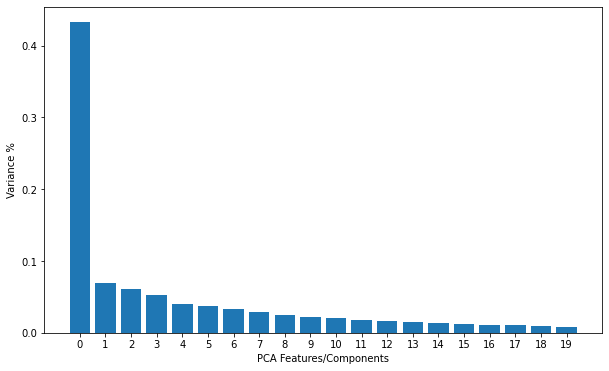

In [32]:
# Create PCA object with 20 components
pca_reg = PCA(n_components=20)

# creating table of our new transformed data
principalComponents_reg = pca_reg.fit_transform(reg_df_scale)

# Plot the explained variances

# list of features for the x-axis
features = range(pca_reg.n_components_)

# plotting variance explained vs PCA features/components
plt.figure(figsize=(10, 6))
plt.bar(features, pca_reg.explained_variance_ratio_, color='C0')
plt.xlabel('PCA Features/Components')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

The first principal components explains 43.25% of the variance and then this drops to 6.99% and 6.07% for the second and third.

In [33]:
# Save components to a DataFrame
PCA_components_reg = pd.DataFrame(principalComponents_reg)

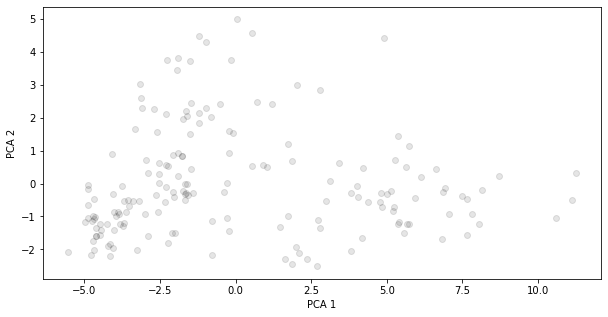

In [34]:
# visualizing the first two components to inspect if there are any clusters
plt.figure(figsize=(10,5))
plt.scatter(PCA_components_reg[0], PCA_components_reg[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

We can see that it is possible to have two or possibly three distinct clusters.

# PCA w/o indexreg

In [35]:
# creating scaler object
scaler = StandardScaler()

# standarding the data to have a mean of 0 and variance of 1
no_reg_df_scale = scaler.fit_transform(no_reg_df)

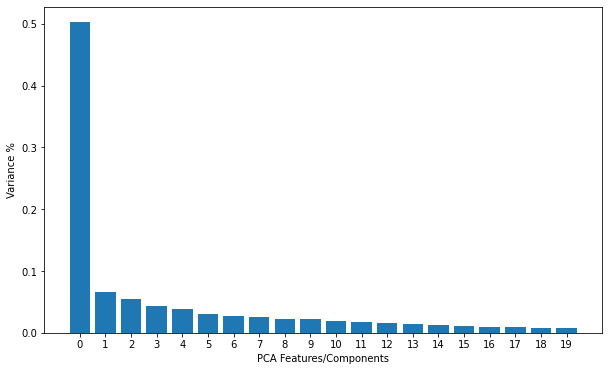

In [36]:
# Create PCA object with 20 components
pca_no_reg = PCA(n_components=20)

# creating table of our new transformed data
principalComponents_no_reg = pca_no_reg.fit_transform(no_reg_df_scale)

# Plot the explained variances
# list of features for the x-axis
features = range(pca_no_reg.n_components_)
plt.figure(figsize=(10, 6))
plt.bar(features, pca_no_reg.explained_variance_ratio_, color='C0')
plt.xlabel('PCA Features/Components')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

Without using the index region, more of the variance is captured in the first principal component compared to the dataframe with the index region. 50.25% is of the variance is explained in the first principal component and 6.64% and 5.54% by the second and third.

In [37]:
# Save components to a DataFrame
PCA_components_no_reg = pd.DataFrame(principalComponents_no_reg)

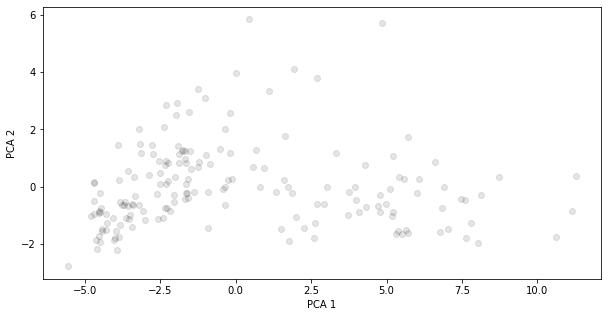

In [38]:
# visualizing the first two components to inspect if there are any clusters
plt.figure(figsize=(10,5))
plt.scatter(PCA_components_no_reg[0], PCA_components_no_reg[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

We can see that there are two clear clusters and possibly a third that might not be as defined based on the shape of this plot and the density of points.

# KMEANS w/ indexreg

## Elbow Method

We can determine the best number of clusters to use with the K-means algorithm by using the elbow method. The goal of K-Means is to minimize something called inertia also know as the within-cluster sum-of-squares errors. We can try out various number of clusters and plot it against the inertia and pick the "elbow point" where the data points are clustered well and going beyond this does not provide additional information.

Source:
https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6#:~:text=For%20the%20k%2Dmeans%20clustering,of%20the%20number%20of%20clusters.

In [39]:
# determing the optimal number of clusters using the elbow method
sum_of_squared_distances = []

# creating a range of Ks to use
K = range(1,15)

# for loop to iterate through different k values
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(reg_df_scale)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


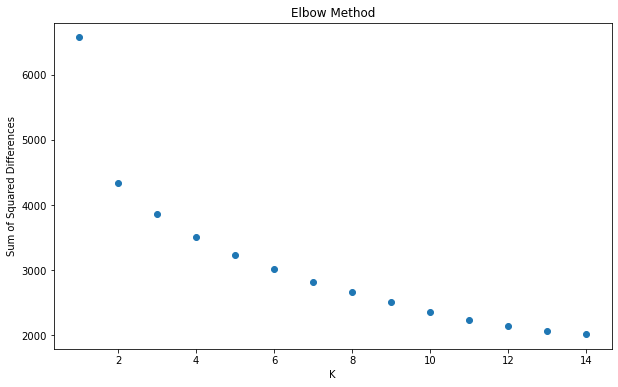

In [40]:
# plotting the inertia/sum of squared differences to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, sum_of_squared_distances)
plt.ylabel('Sum of Squared Differences')
plt.xlabel('K')
plt.title('Elbow Method')
plt.show()

From the elbow method plot, we find that K is optimal at around 2 - 4.

## Silhouette Method

The silhouette method or silhouette coefficient measures how well the data is clustered. A silhouette score of 1 means that the clusters are distinct and apart from each other and 0 means that the clusters overlap and aren't very distinguishable. Plotting the silhouette coefficient against the number of clusters allows us to determine the best number of clusters to use and is not as open to interpretation as the elbow method.

Source:https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6#:~:text=For%20the%20k%2Dmeans%20clustering,of%20the%20number%20of%20clusters.

In [41]:
# determing the optimal number of clusters using the silhouette method
s_score = []

# create a range to use for our for loop
K = range(2,15)

# for loop to iterate through different number of K values
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(reg_df_scale)
    prediction = km.predict(reg_df_scale)
    
    # calculating silhouette score and adding it to list
    silhouette = silhouette_score(reg_df_scale, prediction)
    s_score.append(silhouette)

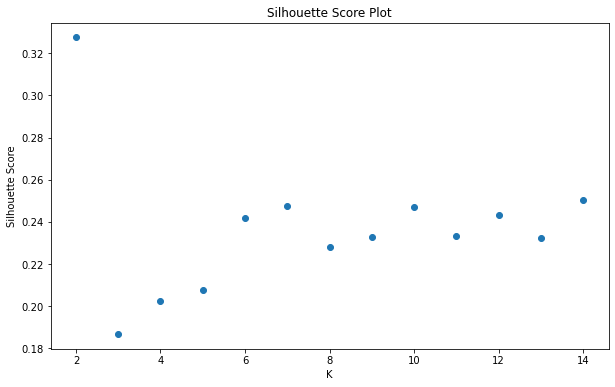

In [42]:
# plotting silhouette coefficent vs number of clusters to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, s_score)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.title('Silhouette Score Plot')
plt.show()

The largest silhouette score that we see is using k = 2 which might not be very informative. The next best number of clusters would be 6.

In [43]:
# keamns clustering using 6 clusters
km = KMeans(n_clusters=6, n_jobs=-1)
km.fit(reg_df_scale)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=6, n_jobs=-1)

In [44]:
# appending the labels to the data
reg_df['Label'] = km.predict(reg_df_scale)
reg_df.head()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg15_cpta,sdg16_homicides,sdg17_govex,E. Europe & C. Asia,East & South Asia,LAC,MENA,OECD,Oceania,Label
0,29.898,53.581,29.8,40.90,9.5,5.5,2.025,638.0,37.1,62.3,...,6.141,7.1,4.7510,1.0,0.0,0.0,0.0,0.0,0.0,2
1,21.030,42.850,25.0,37.60,4.9,8.2,0.905,241.0,28.5,77.2,...,28.367,4.8,5.1210,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.350,4.350,6.2,23.10,9.4,21.7,4.813,15.0,6.5,8.8,...,76.110,2.3,6.7320,1.0,0.0,0.0,0.0,0.0,0.0,3
3,0.360,0.483,2.6,2.58,0.7,31.7,23.576,3.0,4.0,7.6,...,57.903,0.5,11.9866,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.710,2.880,4.6,8.20,1.2,28.3,5.405,39.0,6.4,9.9,...,32.405,5.2,11.1640,0.0,0.0,1.0,0.0,0.0,0.0,5


In [45]:
# creating a new region df w/ labels and country names
reg_labled_df = pd.concat([df_90th[['country', 'indexreg']], reg_df], axis = 1)

In [46]:
# displaying the names of the countries in each region
for x in range(6):
  print('=====================================')
  print(f"Cluster {x}")
  print('=====================================')
  print(f"Number of Countries: {len(reg_labled_df[reg_labled_df['Label'] == x].country.unique())} \n")
  print(f"Countries: \n {reg_labled_df[reg_labled_df['Label'] == x].country.unique()} \n")

Cluster 0
Number of Countries: 36 

Countries: 
 ['United Arab Emirates' 'Australia' 'Austria' 'Belgium' 'Canada'
 'Switzerland' 'Chile' 'Czech Republic' 'Germany' 'Denmark' 'Spain'
 'Estonia' 'Finland' 'France' 'United Kingdom' 'Greece' 'Hungary'
 'Ireland' 'Iceland' 'Israel' 'Italy' 'Japan' 'Korea, Rep.' 'Lithuania'
 'Luxembourg' 'Latvia' 'Malta' 'Netherlands' 'Norway' 'New Zealand'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Sweden' 'United States'] 

Cluster 1
Number of Countries: 20 

Countries: 
 ['Bangladesh' 'Bhutan' 'China' 'Indonesia' 'India' 'Cambodia' 'Lao PDR'
 'Sri Lanka' 'Maldives' 'Myanmar' 'Mongolia' 'Malaysia' 'Nepal' 'Pakistan'
 'Philippines' 'Korea, Dem. Rep.' 'Singapore' 'Thailand' 'Timor-Leste'
 'Vietnam'] 

Cluster 2
Number of Countries: 43 

Countries: 
 ['Afghanistan' 'Angola' 'Burundi' 'Benin' 'Burkina Faso'
 'Central African Republic' "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Comoros' 'Djibouti' 'Eritrea' 'Ethiopia' 'Ghana' 'Guinea'

In [47]:
# looking at the average values of each indicator for each cluster
reg_labled_df.groupby('Label').mean()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex,E. Europe & C. Asia,East & South Asia,LAC,MENA,OECD,Oceania
Label,,,,,,,,,,,,,,,,,,,,,
0,0.385833,0.565361,2.544444,2.617222,0.838889,23.194444,6.209406,6.555556,2.313889,3.972222,...,58.305417,68.510861,1.383333,11.872767,0.027778,0.000000,0.000000,0.027778,0.944444,0.0
1,3.757750,17.465600,13.421500,27.945000,8.755000,6.995000,3.627210,111.550000,13.895000,25.910000,...,49.535550,36.599300,2.925000,5.596520,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
2,39.431651,62.748070,25.638372,33.841860,8.688372,9.146512,1.374651,510.186047,27.637209,71.379070,...,46.102070,45.652605,7.718605,5.494649,0.023256,0.000000,0.023256,0.023256,0.000000,0.0
3,1.373378,5.564595,5.321081,12.166216,4.357838,24.221622,3.674459,26.459459,7.583784,13.513514,...,55.333892,33.403378,2.608108,7.327603,0.567568,0.027027,0.000000,0.351351,0.027027,0.0
4,10.326667,25.416667,8.050000,21.650000,6.966667,32.450000,2.936400,75.000000,11.250000,25.200000,...,71.918333,13.120167,3.716667,7.981933,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
5,7.401194,16.311065,9.867742,14.819355,2.879677,22.164516,2.987739,90.838710,10.941935,20.045161,...,61.150419,43.550674,20.354839,8.966355,0.000000,0.000000,0.774194,0.000000,0.032258,0.0


In [48]:
# what is the distribution of index regions for each cluster
reg_labled_df.groupby('Label').mean().iloc[:, -6:]

,E. Europe & C. Asia,East & South Asia,LAC,MENA,OECD,Oceania
Label,,,,,,
0,0.027778,0.000000,0.000000,0.027778,0.944444,0.0
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
2,0.023256,0.000000,0.023256,0.023256,0.000000,0.0
3,0.567568,0.027027,0.000000,0.351351,0.027027,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
5,0.000000,0.000000,0.774194,0.000000,0.032258,0.0


It appears that the clusters grouped based on the index regions which might not provide us with a lot of information. For example, label 1 is 100% east and south Asian countries and label 4 is 100% Oceania countries.

# Plotting PCA w/ KMEANs

Using the PCA plot with the clusters from the KMeans algorithm allows us the visualize our data in 2 dimensions.

In [49]:
# merging the first 3 PCA components and the labeled clusters from KMEANS
pca_reg_labeled = reg_labled_df[['country', 'Label']].merge(PCA_components_reg.loc[:,[0,1,2]], left_index=True, right_index=True)
pca_reg_labeled.head()

,country,Label,0,1,2
0,Afghanistan,2,5.933127,-0.436578,1.809397
1,Angola,2,6.125962,0.197443,0.121309
2,Albania,3,-1.688160,-0.513177,1.993196
3,United Arab Emirates,0,-5.532035,-2.076605,0.004674
4,Argentina,5,-3.137712,2.597047,-0.299496


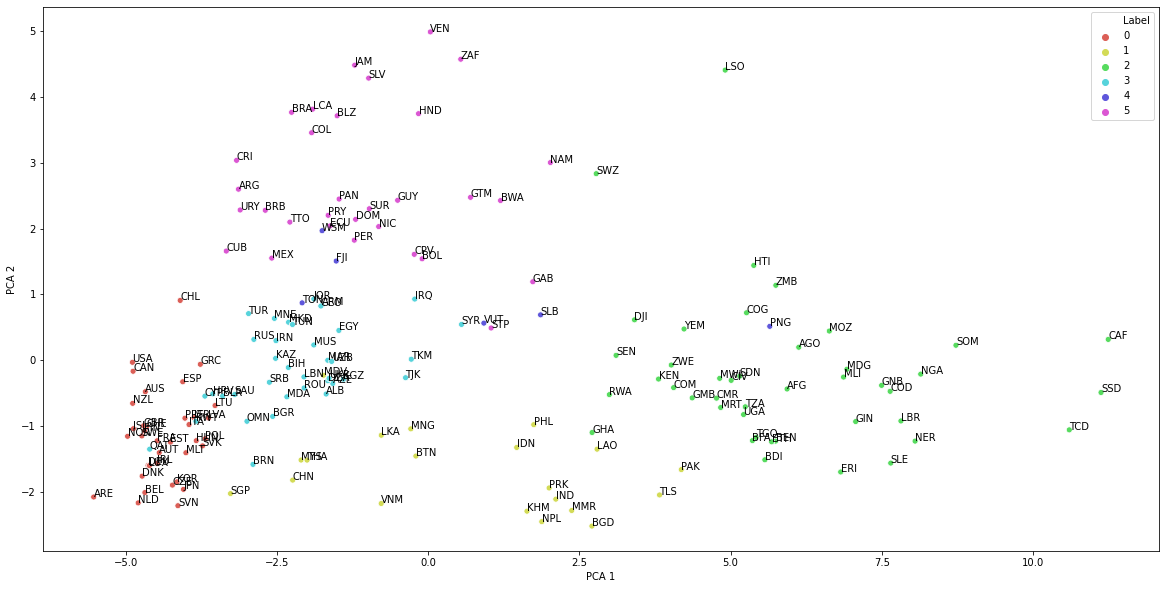

In [53]:
# plotting PCA 2 vs PCA 1 and using the cluster groups to color the data points
plt.figure(figsize=(20, 10))
xdata = pca_reg_labeled[0]
ydata = pca_reg_labeled[1]
sns.scatterplot(x= xdata, y=ydata, hue=pca_reg_labeled['Label'], palette=sns.color_palette('hls', n_colors=6))

# annotating data points with country abbreviations
for idx in df_90th.index:
  plt.annotate(df_90th.loc[idx, 'id'], (xdata[idx], ydata[idx]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

There is overlap within our clusters and we should try clustering without the index regions. We do notice that the countries that are performing poorly are found on the right hand side of the plot.

# KMEANS w/o indexreg

## Elbow Method

In [54]:
# determing the optimal number of clusters using the elbow method
sum_of_squared_distances = []

# creating range of values to use
K = range(1,15)

# for loop to iterate through k values to find the inertias
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(no_reg_df_scale)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


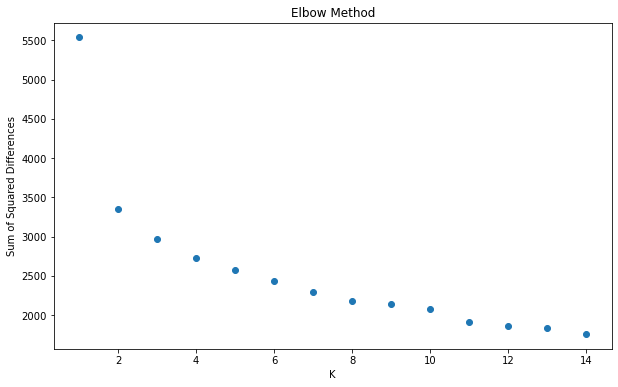

In [55]:
# plotting the inertia/sum of squared differences to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, sum_of_squared_distances)
plt.ylabel('Sum of Squared Differences')
plt.xlabel('K')
plt.title('Elbow Method')
plt.show()

From the elbow method plot, we find that K is optimal at around 2 - 4 (open to interpretation).

## Silhouette Method

In [56]:
# determing the optimal number of clusters using the elbow method
s_score = []

# creating range of values to use to find silhouette scores
K = range(2,15)

# for loop to iterate through k values and to calculate silhouette scores
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(no_reg_df_scale)
    prediction = km.predict(no_reg_df_scale)

    # calculating silhouette scores and adding to s_score list
    silhouette = silhouette_score(no_reg_df_scale,prediction)
    s_score.append(silhouette)

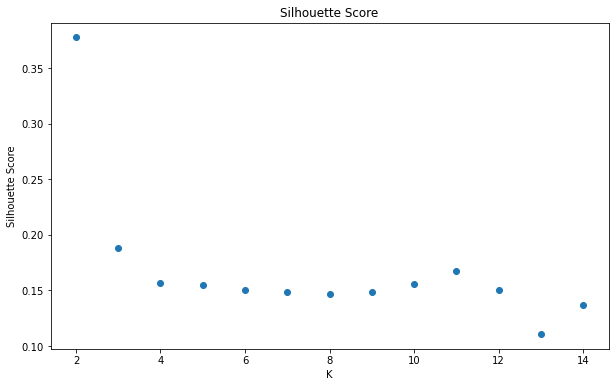

In [57]:
# plotting the silhouette coefficient vs. number of clusters to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, s_score)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.title('Silhouette Score')
plt.show()

The largest silhouette score that we see is using k = 2 which might not be very informative. We can also try k = 3 clusters which is the next best.

In [62]:
# keamns clustering using 3 clusters
km = KMeans(n_clusters=3, n_jobs=-1)
km.fit(no_reg_df_scale)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [63]:
# appending the labels to the data
no_reg_df['Label'] = km.predict(no_reg_df_scale)
no_reg_df.head()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex,Label
0,29.898,53.581,29.8,40.90,9.5,5.5,2.025,638.0,37.1,62.3,...,13.500,41.8949,45.1010,1.663,0.369,48.357,6.141,7.1,4.7510,1
1,21.030,42.850,25.0,37.60,4.9,8.2,0.905,241.0,28.5,77.2,...,14.339,45.0750,57.9660,0.573,1.268,54.970,28.367,4.8,5.1210,1
2,0.350,4.350,6.2,23.10,9.4,21.7,4.813,15.0,6.5,8.8,...,71.847,41.6820,92.3570,1.769,1.487,56.660,76.110,2.3,6.7320,2
3,0.360,0.483,2.6,2.58,0.7,31.7,23.576,3.0,4.0,7.6,...,98.450,32.5100,98.3372,1.797,23.505,68.270,57.903,0.5,11.9866,0
4,0.710,2.880,4.6,8.20,1.2,28.3,5.405,39.0,6.4,9.9,...,74.295,46.6730,97.9790,1.195,4.575,81.930,32.405,5.2,11.1640,2


In [64]:
# adding country names to our clustered data
no_reg_labeled_df = pd.concat([df_90th[['country', 'indexreg']], no_reg_df], axis = 1)

In [65]:
# displaying the names of the countries in each region
for x in range(3):
  print('=====================================')
  print(f"Cluster {x}")
  print('=====================================')
  print(f"Number of Countries: {len(no_reg_labeled_df[no_reg_labeled_df['Label'] == x].country.unique())} \n")
  print(f"Countries: \n {no_reg_labeled_df[no_reg_labeled_df['Label'] == x].country.unique()} \n")

Cluster 0
Number of Countries: 48 

Countries: 
 ['United Arab Emirates' 'Australia' 'Austria' 'Belgium' 'Bulgaria'
 'Belarus' 'Brunei Darussalam' 'Canada' 'Switzerland' 'Chile' 'China'
 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'United Kingdom' 'Greece' 'Croatia' 'Hungary'
 'Ireland' 'Iceland' 'Israel' 'Italy' 'Japan' 'Korea, Rep.' 'Kuwait'
 'Lithuania' 'Luxembourg' 'Latvia' 'Malta' 'Netherlands' 'Norway'
 'New Zealand' 'Oman' 'Poland' 'Portugal' 'Qatar' 'Saudi Arabia'
 'Singapore' 'Slovak Republic' 'Slovenia' 'Sweden' 'United States'] 

Cluster 1
Number of Countries: 49 

Countries: 
 ['Afghanistan' 'Angola' 'Burundi' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Central African Republic' "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Comoros' 'Djibouti' 'Eritrea' 'Ethiopia' 'Ghana' 'Guinea'
 'Gambia, The' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Lao PDR' 'Liberia'
 'Lesotho' 'Madagascar' 'Mali' 'Myanmar' 'Mozambique' 'Mauritania'
 'Mal

In [66]:
# looking at the average values of each indicator for each cluster
no_reg_labeled_df.groupby('Label').mean()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
Label,,,,,,,,,,,,,,,,,,,,,
0,0.433271,0.820187,2.898750,3.807500,1.477083,23.272917,5.940183,8.812500,2.541667,4.620833,...,5.141333,85.376896,36.147650,97.945829,1.779062,9.756500,57.686938,63.718292,1.393750,11.056110
1,36.077163,59.594429,24.666531,34.877551,8.920408,9.014286,1.676122,468.836735,27.261224,68.487755,...,6.159653,19.399306,45.545792,62.617000,1.132584,0.385551,46.466245,44.139347,7.377551,5.304051
2,4.450526,12.794329,8.760000,16.526447,4.779079,20.886842,3.080622,69.131579,10.251316,18.755263,...,8.385421,55.745908,45.401489,89.479626,1.540082,3.470539,57.905303,34.274341,10.021053,7.657868


In [67]:
# distribution of index regions in each cluster group
no_reg_labeled_df.groupby('Label')['indexreg'].value_counts()

Label  indexreg           
0      OECD                   34
       E. Europe & C. Asia     5
       MENA                    5
       East & South Asia       3
       LAC                     1
1      Africa                 40
       East & South Asia       5
       E. Europe & C. Asia     1
       LAC                     1
       MENA                    1
       Oceania                 1
2      LAC                    23
       E. Europe & C. Asia    17
       East & South Asia      13
       MENA                    9
       Africa                  7
       Oceania                 5
       OECD                    2
Name: indexreg, dtype: int64

# Identifying Countries Performing Poorly

In [68]:
# merging the first 3 PCA components and the labeled clusters from KMEANS
pca_labeled = no_reg_labeled_df[['country', 'Label']].merge(PCA_components_no_reg.loc[:,[0,1,2]], left_index=True, right_index=True)
pca_labeled.head()

,country,Label,0,1,2
0,Afghanistan,1,6.025640,-0.213935,-1.872113
1,Angola,1,6.088359,0.266475,-0.539051
2,Albania,2,-1.682104,-0.431685,-1.606036
3,United Arab Emirates,0,-5.557151,-2.788086,0.567882
4,Argentina,2,-3.190254,1.481865,0.127137


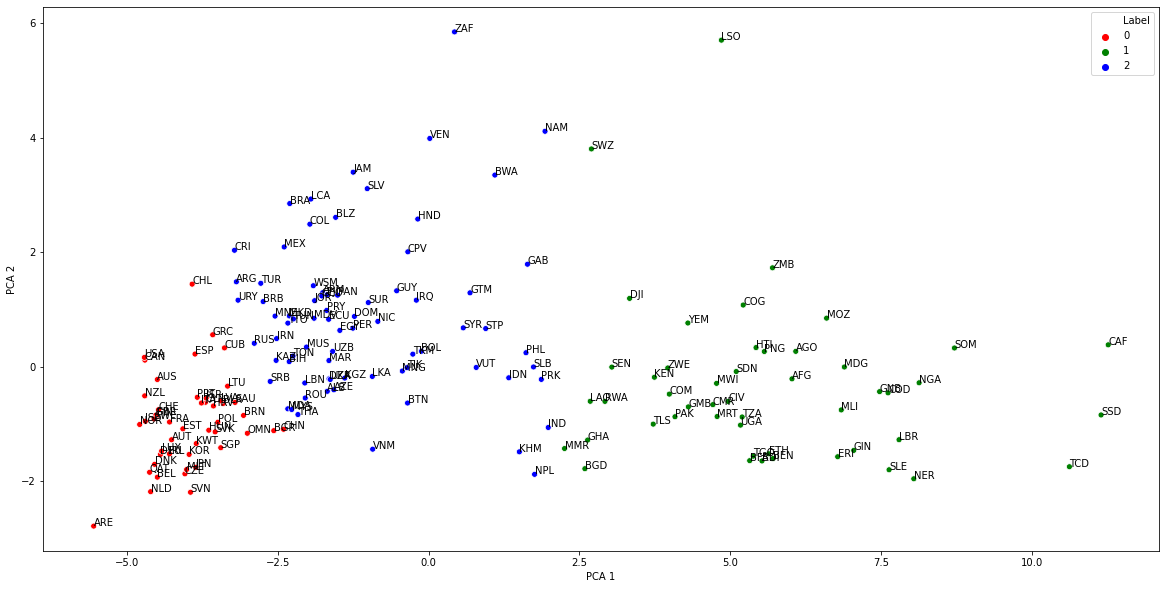

In [69]:
# plotting PCA 2 vs PCA 1 and using the cluster groups to color the data points
plt.figure(figsize=(20, 10))
xdata = pca_labeled[0]
ydata = pca_labeled[1]
sns.scatterplot(x= xdata, y=ydata, hue=pca_labeled['Label'],  palette=['red','green','blue'])

# annotating data points with country abbreviations
for idx in df_90th.index:
  plt.annotate(df_90th.loc[idx, 'id'], (xdata[idx], ydata[idx]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

The 3 countries performing the worse are Central African Republic (CAF), Chad (TCD), South Soudan (SSD).

In [70]:
# country distribution of cluster/group that stand out negatively
no_reg_labeled_df[no_reg_labeled_df['Label'] == 1]['indexreg'].value_counts(normalize=True)

Africa                 0.816327
East & South Asia      0.102041
LAC                    0.020408
MENA                   0.020408
E. Europe & C. Asia    0.020408
Oceania                0.020408
Name: indexreg, dtype: float64

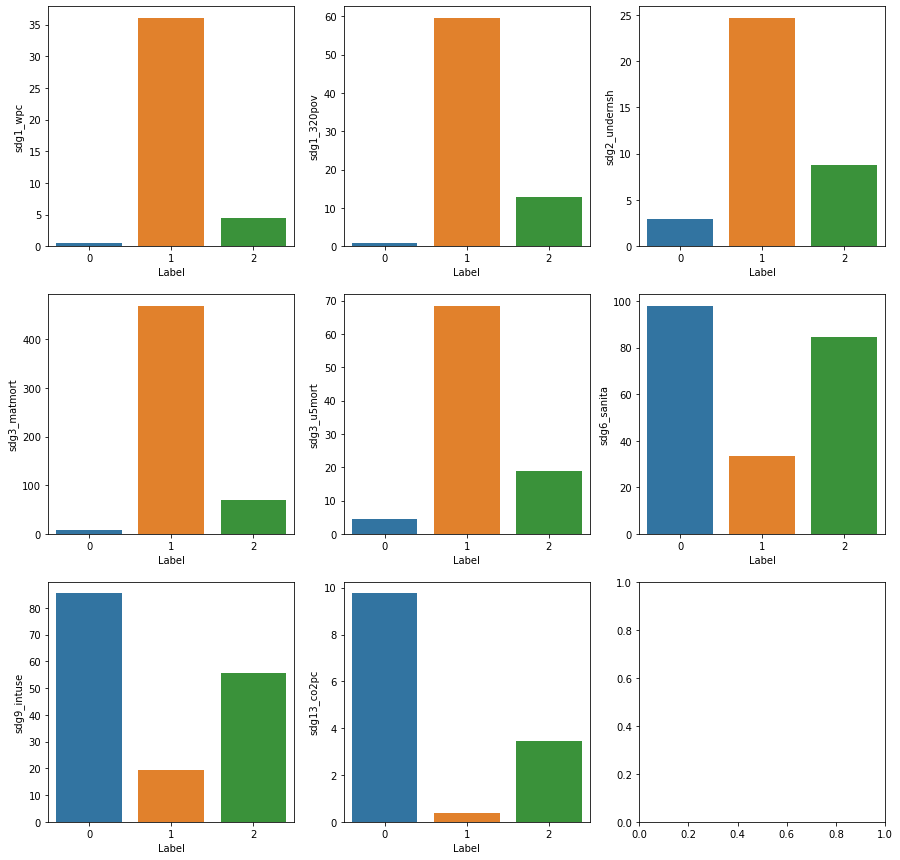

In [71]:
# columns of interest
col_int = ['sdg1_wpc', 'sdg1_320pov', 'sdg2_undernsh', 'sdg3_matmort', 'sdg3_u5mort', 'sdg6_sanita', 'sdg9_intuse', 'sdg13_co2pc']

# creating table with mean values for each group
agg_df = no_reg_labeled_df.groupby('Label').mean().reset_index()

# plotting subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# looping through raveled axes to plot subplots
for i, ax in enumerate(axes.ravel()[:-1]):
  sns.barplot(x=agg_df['Label'], y=agg_df[col_int[i]], ax=ax)
plt.show()

The countries that stand out are those colored in green or in cluster #1. As we saw from the distribution of the countries in this group, the majority of them are located in Africa (81.63%). The next biggest group is East & South Asia (10.2%) followed by LAC, MENA, Oceania and then E. Europe & C. Asia (2.04% respectively). In ths group, the average percentage of population living in poverty under both 1.90 and 3.20 dollars per day is substantially higher than those in the other clusters. Other features that are substantially higher than it's peers are sdg2_undernsh, sdg3_matmort and sdg3_u5mort. The featueres that are substantially lower than the other groups are sdg6_sanita, sdg9_intuse and sdg13_co2pc. Overall, these are the features that stood out significantly and as a whole - the countries in these groups are at the bottom of the rankings when it comes to sustainable development goals. Looking at the PCA plot, we can see that these countries are grouped together and located on bottom right or the right third of the plot as a whole. The 3 countries performing the worst in these 8 categories are Central African Republic (CAF), Chad (TCD), South Soudan (SSD).

# Identifying Poor Performing Countries with Population <9M

In [72]:
# creating indexes for countries w/ >= 9M pop and countries w/ < 9M pop
great_9_pop_idx = df_90th[df_90th['pop_2020'] >= 9000000].index
less_9_pop_idx = df_90th[df_90th['pop_2020'] < 9000000].index

In [73]:
# creating dfs for greater than 9 and less than 9 population
great_9_pop = no_reg_df.drop('Label', axis=1).loc[great_9_pop_idx]
less_9_pop = no_reg_df.drop('Label', axis=1).loc[less_9_pop_idx]

# PCA Large Population

In [74]:
# creating scaler object
scaler = StandardScaler()

# standarding the data to have a mean of 0 and variance of 1
great_9_pop_scale = scaler.fit_transform(great_9_pop)

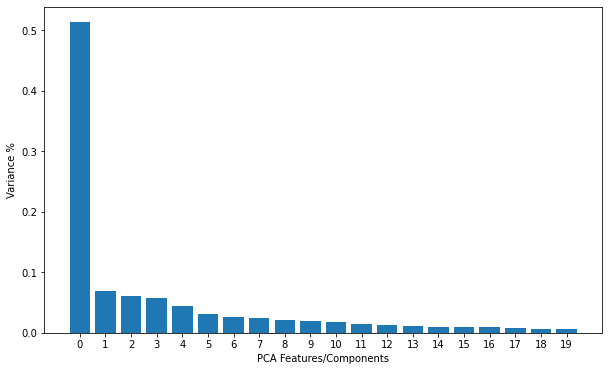

In [75]:
# Create PCA object with 20 components
pca_great = PCA(n_components=20)

# creating table of our new transformed data
principalComponents_great = pca_great.fit_transform(great_9_pop_scale)

# Plot the explained variances
# list of features for the x-axis
features = range(pca_great.n_components_)

plt.figure(figsize=(10, 6))
plt.bar(features, pca_great.explained_variance_ratio_, color='C0')
plt.xlabel('PCA Features/Components')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

In [76]:
# Save components to a DataFrame
PCA_components_great = pd.DataFrame(principalComponents_great)

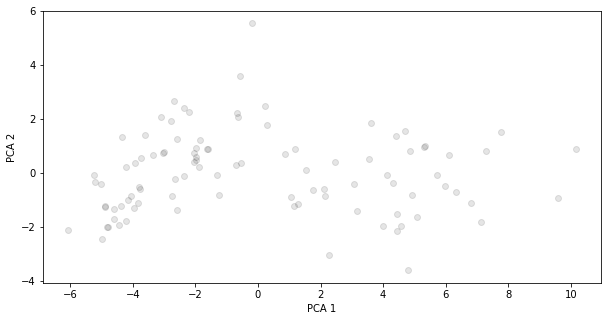

In [77]:
# visualizing the first two components to inspect if there are any clusters
plt.figure(figsize=(10,5))
plt.scatter(PCA_components_great[0], PCA_components_great[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# PCA Small Population

In [78]:
# creating scaler object
scaler = StandardScaler()

# standarding the data to have a mean of 0 and variance of 1
less_9_pop_scale = scaler.fit_transform(less_9_pop)

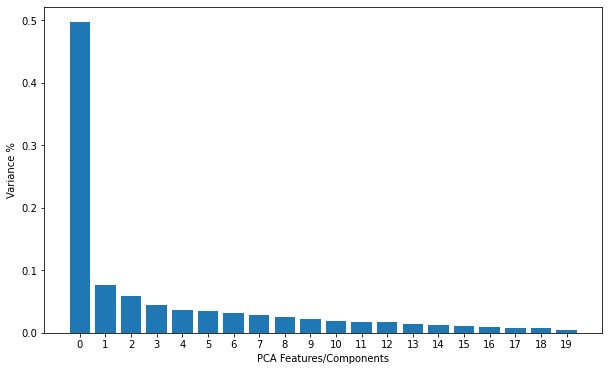

In [79]:
# Create PCA object with 20 components
pca_less = PCA(n_components=20)

# creating table of our new transformed data
principalComponents_less = pca_less.fit_transform(less_9_pop_scale)

# list of features for the x-axis
features = range(pca_less.n_components_)

# Plot the explained variances
plt.figure(figsize=(10, 6))
plt.bar(features, pca_less.explained_variance_ratio_, color='C0')
plt.xlabel('PCA Features/Components')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

In [80]:
# Save components to a DataFrame
PCA_components_less = pd.DataFrame(principalComponents_less)

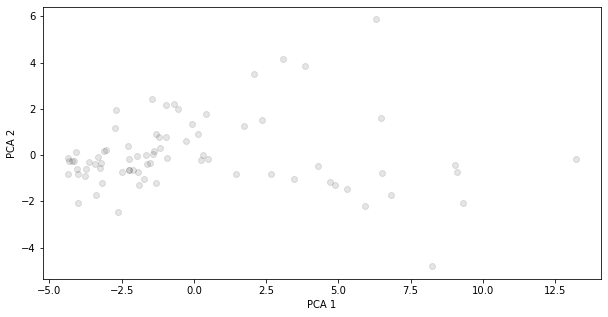

In [81]:
# visualizing the first two components to inspect if there are any clusters
plt.figure(figsize=(10,5))
plt.scatter(PCA_components_less[0], PCA_components_less[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# KMEANS w/ Large Population

## Elbow Method

In [82]:
# determing the optimal number of clusters using the elbow method
sum_of_squared_distances = []

# creating a range of Ks to use
K = range(1,15)

# for loop to iterate through different k values
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(great_9_pop_scale)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


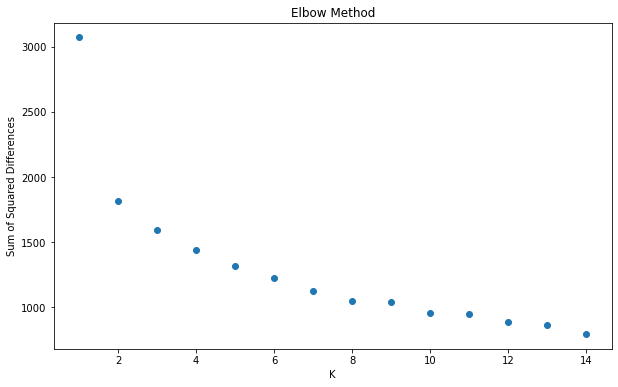

In [83]:
# plotting the inertia/sum of squared differences to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, sum_of_squared_distances)
plt.ylabel('Sum of Squared Differences')
plt.xlabel('K')
plt.title('Elbow Method')
plt.show()

## Silhouette Method

In [84]:
# determing the optimal number of clusters using the silhouette method
s_score = []

# create a range to use for our for loop
K = range(2,15)

# for loop to iterate through different number of K values
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(great_9_pop_scale)
    prediction = km.predict(great_9_pop_scale)

    # calculating silhouette score and adding it to list
    silhouette = silhouette_score(great_9_pop_scale, prediction)
    s_score.append(silhouette)

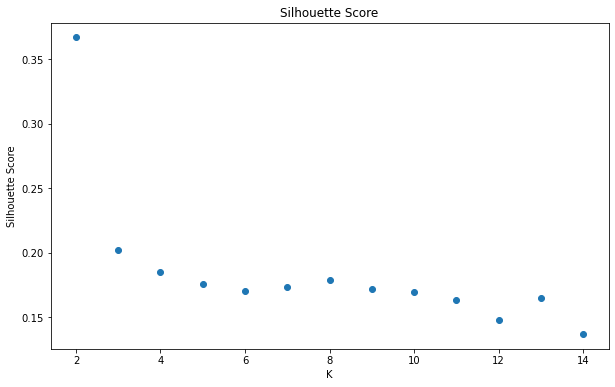

In [85]:
# plotting  silhouette coefficent vs number of clusters to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, s_score)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.title('Silhouette Score')
plt.show()

The largest silhouette score that we see is using k = 2 which might not be very informative. We can use the second best value of 3.

In [93]:
# keamns clustering using 3 clusters
km = KMeans(n_clusters=3, n_jobs=-1)
km.fit(great_9_pop_scale)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [94]:
# appending the labels to the data
great_9_pop['Label'] = km.predict(great_9_pop_scale)
great_9_pop.head()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex,Label
0,29.898,53.581,29.8,40.90,9.5,5.5,2.025,638.0,37.1,62.3,...,13.500,41.8949,45.1010,1.663,0.369,48.357,6.141,7.1,4.7510,1
1,21.030,42.850,25.0,37.60,4.9,8.2,0.905,241.0,28.5,77.2,...,14.339,45.0750,57.9660,0.573,1.268,54.970,28.367,4.8,5.1210,1
3,0.360,0.483,2.6,2.58,0.7,31.7,23.576,3.0,4.0,7.6,...,98.450,32.5100,98.3372,1.797,23.505,68.270,57.903,0.5,11.9866,2
4,0.710,2.880,4.6,8.20,1.2,28.3,5.405,39.0,6.4,9.9,...,74.295,46.6730,97.9790,1.195,4.575,81.930,32.405,5.2,11.1640,2
6,0.520,0.630,2.5,2.00,0.0,29.0,2.674,6.0,2.3,3.7,...,86.545,36.9250,92.3720,1.716,14.765,80.260,52.671,0.8,11.5910,2


In [95]:
# creating labelled df
great_9_labeled = pd.concat([df_90th.loc[great_9_pop_idx][['country', 'indexreg']], great_9_pop], axis = 1)

In [96]:
# displaying the names of the countries in each region
for x in range(3):
  print('=====================================')
  print(f"Cluster {x}")
  print('=====================================')
  print(f"Number of Countries: {len(great_9_labeled[great_9_labeled['Label'] == x].country.unique())} \n")
  print(f"Countries: \n {great_9_labeled[great_9_labeled['Label'] == x].country.unique()} \n")

Cluster 0
Number of Countries: 39 

Countries: 
 ['Azerbaijan' 'Bangladesh' 'Bolivia' 'Brazil' 'China' 'Colombia'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Guatemala'
 'Honduras' 'Indonesia' 'India' 'Iran, Islamic Rep.' 'Iraq' 'Jordan'
 'Kazakhstan' 'Cambodia' 'Sri Lanka' 'Morocco' 'Mexico' 'Myanmar'
 'Malaysia' 'Nepal' 'Peru' 'Philippines' 'Korea, Dem. Rep.' 'Romania'
 'Syrian Arab Republic' 'Thailand' 'Tajikistan' 'Tunisia' 'Turkey'
 'Ukraine' 'Uzbekistan' 'Venezuela, RB' 'Vietnam' 'South Africa'] 

Cluster 1
Number of Countries: 31 

Countries: 
 ['Afghanistan' 'Angola' 'Burundi' 'Benin' 'Burkina Faso' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Ethiopia' 'Ghana' 'Guinea' 'Haiti' 'Kenya'
 'Madagascar' 'Mali' 'Mozambique' 'Malawi' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Sudan' 'Senegal' 'Somalia' 'South Sudan' 'Chad' 'Tanzania'
 'Uganda' 'Yemen, Rep.' 'Zambia' 'Zimbabwe'] 

Cluster 2
Number of Countries: 26 

Countries: 
 ['United Arab Emirates' 'Argentina' 'A

In [97]:
# looking at the average values of each indicator for each cluster
great_9_labeled.groupby('Label').mean()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
Label,,,,,,,,,,,,,,,,,,,,,
0,3.864359,12.956128,9.606667,20.371795,5.735897,18.461538,3.461615,77.512821,11.082051,20.466667,...,6.980256,54.259923,44.883131,83.759849,1.126592,3.140949,53.015872,36.100564,9.041026,6.623192
1,38.958774,62.900613,25.968710,35.022581,8.458065,8.577419,1.493355,473.612903,27.629032,71.174194,...,5.795419,19.751839,45.097077,62.420516,1.278894,0.336129,45.282903,48.162097,6.454839,5.324868
2,0.500038,0.963346,2.769231,3.576538,1.567692,23.807692,6.216923,9.730769,2.592308,4.630769,...,5.707885,84.219962,37.521877,97.793827,1.601654,8.824538,60.720000,61.662154,2.011538,11.886100


In [98]:
# merging the first 3 PCA components and the labeled clusters from KMEANS
pca_great_labeled = great_9_labeled[['country', 'Label']].reset_index(drop=True).merge(PCA_components_great.loc[:,[0,1,2]], left_index=True, right_index=True)

# adding ID columns
pca_great_labeled = pca_great_labeled.merge(df_90th[['country', 'id']])

pca_great_labeled.head(10)

,country,Label,0,1,2,id
0,Afghanistan,1,5.314212,0.968455,0.169812,AFG
1,Angola,1,5.353403,0.994511,-0.007044,AGO
2,United Arab Emirates,2,-6.063090,-2.096170,-2.297979,ARE
3,Argentina,2,-3.616005,1.430453,-0.275581,ARG
4,Australia,2,-5.027607,-0.416978,-0.854062,AUS
5,Austria,2,-4.594236,-1.705960,-0.937279,AUT
6,Azerbaijan,0,-1.875425,0.236473,-0.289051,AZE
7,Burundi,1,4.785334,-3.599892,1.433167,BDI
8,Belgium,2,-4.825815,-2.007831,-1.141436,BEL
9,Benin,1,5.068573,-1.621319,-1.135799,BEN


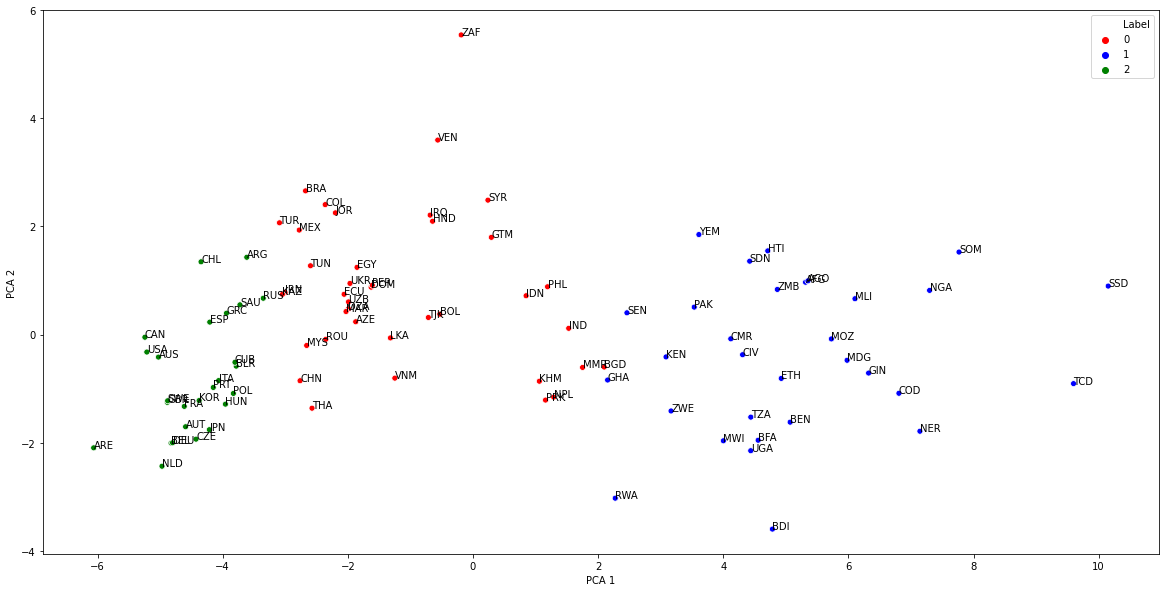

In [100]:
# plotting PCA 2 vs PCA 1 and using the cluster groups to color the data points
plt.figure(figsize=(20, 10))
xdata = pca_great_labeled[0]
ydata = pca_great_labeled[1]
sns.scatterplot(x= xdata, y=ydata, hue=pca_great_labeled['Label'], palette=['red','blue','green'])

# annotating data points with country abbreviations
for idx in pca_great_labeled.index:
  plt.annotate(pca_great_labeled.loc[idx, 'id'], (xdata[idx], ydata[idx]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

# KMEANS w/ small population

## Elbow Method

In [101]:
# determing the optimal number of clusters using the elbow method
sum_of_squared_distances = []

# creating a range of Ks to use
K = range(1,15)

# for loop to iterate through different k values
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(less_9_pop_scale)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


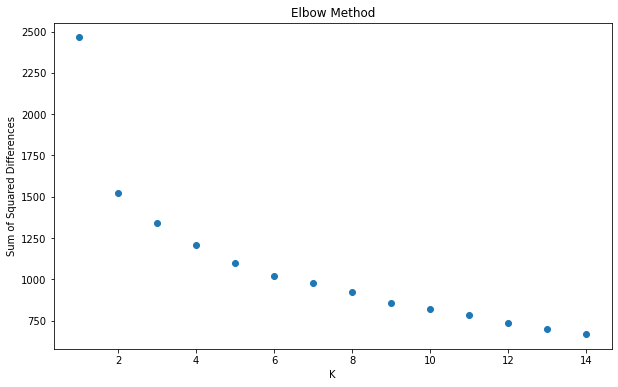

In [102]:
# plotting the inertia/sum of squared differences to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, sum_of_squared_distances)
plt.ylabel('Sum of Squared Differences')
plt.xlabel('K')
plt.title('Elbow Method')
plt.show()

## Silhouette Method

In [103]:
# determing the optimal number of clusters using the silhouette method
s_score = []

# create a range to use for our for loop
K = range(2,15)

# for loop to iterate through different number of K values
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(less_9_pop_scale)
    prediction = km.predict(less_9_pop_scale)

    # calculating silhouette score and adding it to list
    silhouette = silhouette_score(less_9_pop_scale, prediction)
    s_score.append(silhouette)

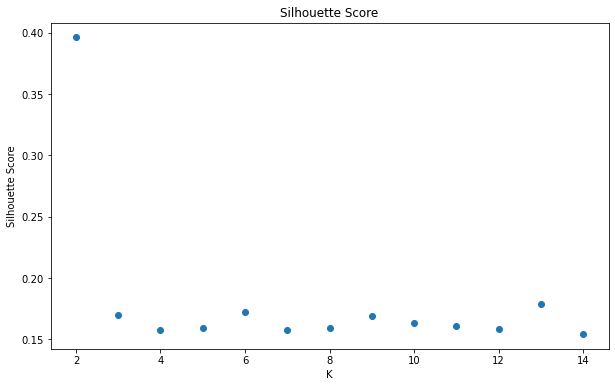

In [104]:
# plotting the silhouette coefficent vs number of clusters to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, s_score)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.title('Silhouette Score')
plt.show()

The largest silhouette score that we see is using k = 2 which might not be very informative. The next best is 3.

In [105]:
# keamns clustering
km = KMeans(n_clusters=3, n_jobs=-1)
km.fit(less_9_pop_scale)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [106]:
# appending the labels to the data
less_9_pop['Label'] = km.predict(less_9_pop_scale)
less_9_pop.head()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex,Label
2,0.35,4.35,6.2,23.1,9.4,21.7,4.813,15.0,6.5,8.8,...,71.847,41.682,92.357,1.769,1.487,56.660,76.110,2.3,6.7320,1
5,0.72,6.51,4.3,9.4,4.2,20.2,1.975,26.0,6.5,12.4,...,64.745,47.464,99.000,0.729,1.973,55.237,21.547,2.4,4.3910,1
14,1.27,2.01,3.6,8.8,3.2,25.0,5.480,10.0,3.6,7.1,...,64.782,40.930,99.000,1.563,6.237,42.270,98.852,1.5,8.1100,2
15,0.07,0.23,2.5,8.9,2.3,17.9,3.732,10.0,4.1,5.8,...,70.120,34.147,97.645,2.024,6.654,40.590,18.182,1.2,7.9776,1
17,11.47,24.10,7.5,15.0,1.8,24.1,4.229,36.0,8.6,13.0,...,47.083,51.290,95.367,1.588,1.711,66.260,45.962,37.9,11.1850,1


In [107]:
# creating a new region df w/ labels and country names
less_9_labeled = pd.concat([df_90th.loc[less_9_pop_idx][['country', 'indexreg']], less_9_pop], axis = 1)

In [108]:
# displaying the names of the countries in each region
for x in range(3):
  print('=====================================')
  print(f"Cluster {x}")
  print('=====================================')
  print(f"Number of Countries: {len(less_9_labeled[less_9_labeled['Label'] == x].country.unique())} \n")
  print(f"Countries: \n {less_9_labeled[less_9_labeled['Label'] == x].country.unique()} \n")

Cluster 0
Number of Countries: 15 

Countries: 
 ['Central African Republic' 'Congo, Rep.' 'Comoros' 'Djibouti' 'Eritrea'
 'Gambia, The' 'Guinea-Bissau' 'Lao PDR' 'Liberia' 'Lesotho' 'Mauritania'
 'Papua New Guinea' 'Sierra Leone' 'Togo' 'Timor-Leste'] 

Cluster 1
Number of Countries: 38 

Countries: 
 ['Albania' 'Armenia' 'Bosnia and Herzegovina' 'Belize' 'Barbados' 'Bhutan'
 'Botswana' 'Cabo Verde' 'Costa Rica' 'Fiji' 'Gabon' 'Georgia' 'Guyana'
 'Jamaica' 'Kyrgyz Republic' 'Lebanon' 'St. Lucia' 'Moldova' 'Maldives'
 'North Macedonia' 'Montenegro' 'Mongolia' 'Mauritius' 'Namibia'
 'Nicaragua' 'Panama' 'Paraguay' 'Solomon Islands' 'El Salvador' 'Serbia'
 'Sao Tome and Principe' 'Suriname' 'Eswatini' 'Turkmenistan' 'Tonga'
 'Trinidad and Tobago' 'Vanuatu' 'Samoa'] 

Cluster 2
Number of Countries: 24 

Countries: 
 ['Bulgaria' 'Brunei Darussalam' 'Switzerland' 'Cyprus' 'Denmark' 'Estonia'
 'Finland' 'Croatia' 'Ireland' 'Iceland' 'Israel' 'Kuwait' 'Lithuania'
 'Luxembourg' 'Latvia' 'Malta

In [109]:
# looking at the average values of each indicator for each cluster
less_9_labeled.groupby('Label').mean()

,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,sdg2_crlyld,sdg3_matmort,sdg3_neonat,sdg3_u5mort,...,sdg8_unemp,sdg9_intuse,sdg10_adjgini,sdg11_pipedwat,sdg12_msw,sdg13_co2pc,sdg14_cleanwat,sdg15_cpta,sdg16_homicides,sdg17_govex
Label,,,,,,,,,,,,,,,,,,,,,
0,34.291267,57.727200,23.848667,35.500000,10.106667,9.993333,1.778267,495.400000,28.126667,67.913333,...,6.287667,16.372067,46.026493,62.966333,0.840260,0.418933,49.559933,37.580467,9.826667,5.349307
1,6.123684,15.008158,8.842105,14.027368,4.177632,21.584211,2.676166,80.184211,10.381579,19.523684,...,9.845447,53.621132,46.079555,92.669382,1.928161,3.463211,60.258184,33.162997,10.552632,8.332268
2,0.346500,0.641333,2.839167,4.543333,1.425000,23.800000,5.420033,8.916667,2.683333,4.895833,...,4.881833,86.833292,35.495975,98.326804,1.951583,10.446833,56.804292,62.420500,1.525000,10.137917


In [110]:
# merging the first 3 PCA components and the labeled clusters from KMEANS
pca_less_labeled = less_9_labeled[['country', 'Label']].reset_index(drop=True).merge(PCA_components_less.loc[:,[0,1,2]], left_index=True, right_index=True)

# adding ID columns
pca_less_labeled = pca_less_labeled.merge(df_90th[['country', 'id']])

pca_less_labeled.head()

,country,Label,0,1,2,id
0,Albania,1,-1.314814,-1.221345,-1.326484,ALB
1,Armenia,1,-1.378844,0.191174,-1.931448,ARM
2,Bulgaria,2,-2.235850,-0.664437,1.263425,BGR
3,Bosnia and Herzegovina,1,-2.091274,-0.637383,-1.708414,BIH
4,Belize,1,-0.951110,2.151152,-0.326492,BLZ


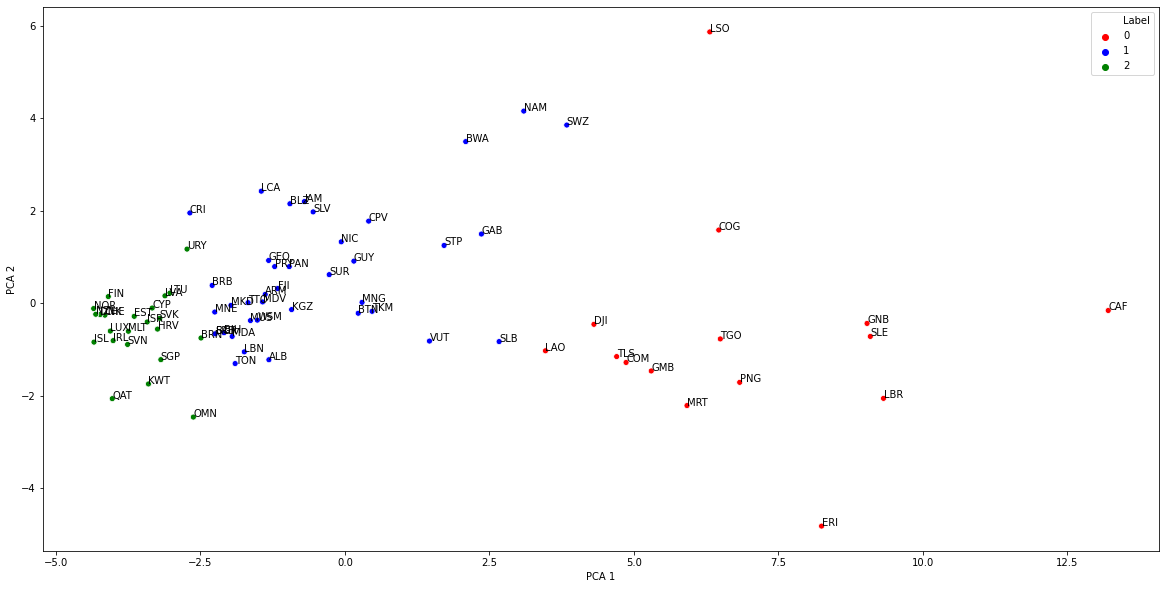

In [112]:
# plotting PCA 2 vs PCA 1 and using the cluster groups to color the data points
plt.figure(figsize=(20, 10))
xdata = pca_less_labeled[0]
ydata = pca_less_labeled[1]
sns.scatterplot(x= xdata, y=ydata, hue=pca_less_labeled['Label'], palette=['red','blue','green'])

# annotating data points with country abbreviations
for idx in pca_less_labeled.index:
  plt.annotate(pca_less_labeled.loc[idx, 'id'], (xdata[idx], ydata[idx]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

# Results

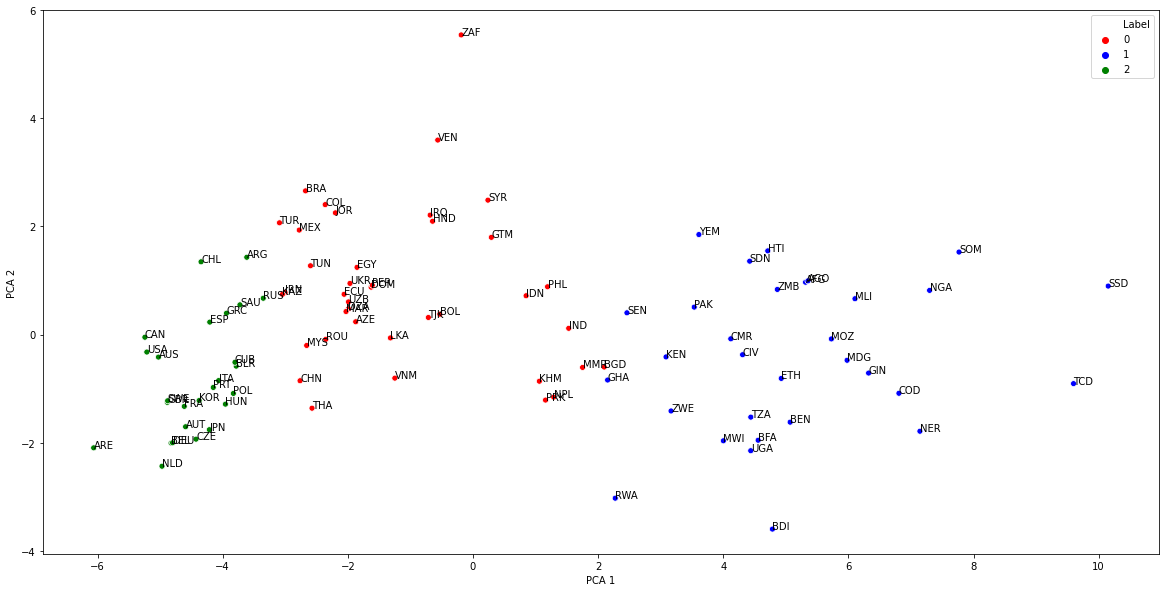

In [114]:
# Greater than 9 million
# plotting PCA 2 vs PCA 1 and using the cluster groups to color the data points
plt.figure(figsize=(20, 10))
xdata = pca_great_labeled[0]
ydata = pca_great_labeled[1]
sns.scatterplot(x= xdata, y=ydata, hue=pca_great_labeled['Label'], palette=['red','blue','green'])

# annotating data points with country abbreviations
for idx in pca_great_labeled.index:
  plt.annotate(pca_great_labeled.loc[idx, 'id'], (xdata[idx], ydata[idx]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

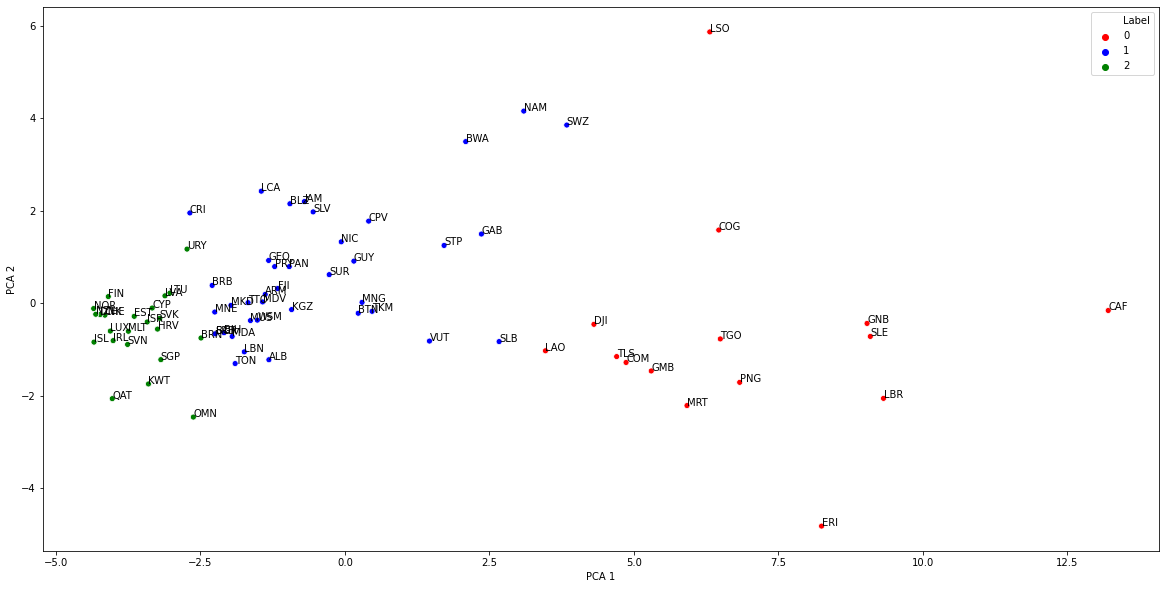

In [117]:
# Less than 9 million
# plotting PCA 2 vs PCA 1 and using the cluster groups to color the data points
plt.figure(figsize=(20, 10))
xdata = pca_less_labeled[0]
ydata = pca_less_labeled[1]
sns.scatterplot(x= xdata, y=ydata, hue=pca_less_labeled['Label'], palette=['red','blue','green'])

# annotating data points with country abbreviations
for idx in pca_less_labeled.index:
  plt.annotate(pca_less_labeled.loc[idx, 'id'], (xdata[idx], ydata[idx]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [119]:
# displaying the names of the countries in each region
print('=====================================')
print('Less than 9 mil population:')
print('=====================================')
print(f"Countries: \n {less_9_labeled[less_9_labeled['Label'] == 0].country.unique()} \n")

# displaying the names of the countries in each region
print('=====================================')
print('Greater than and equal to 9 mil population:')
print('=====================================')
print(f"Countries: \n {great_9_labeled[great_9_labeled['Label'] == 1].country.unique()} \n")  

Less than 9 mil population:
Countries: 
 ['Central African Republic' 'Congo, Rep.' 'Comoros' 'Djibouti' 'Eritrea'
 'Gambia, The' 'Guinea-Bissau' 'Lao PDR' 'Liberia' 'Lesotho' 'Mauritania'
 'Papua New Guinea' 'Sierra Leone' 'Togo' 'Timor-Leste'] 

Greater than and equal to 9 mil population:
Countries: 
 ['Afghanistan' 'Angola' 'Burundi' 'Benin' 'Burkina Faso' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Ethiopia' 'Ghana' 'Guinea' 'Haiti' 'Kenya'
 'Madagascar' 'Mali' 'Mozambique' 'Malawi' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Sudan' 'Senegal' 'Somalia' 'South Sudan' 'Chad' 'Tanzania'
 'Uganda' 'Yemen, Rep.' 'Zambia' 'Zimbabwe'] 



According to our new analysis, the countries at greatest risk of not reaching the sustainable development goals are shown above for the two subgroups - on the bottom right or right third of the plot. Performing this analysis may change the results due to new similarities in indicators of subgroups which may have been diluted due to the inclusion of countries of all populations.\

In countries with a population less than 9 million people, the 3 countries most at risk are Central African Republic, Liberia, and Sierra Leone. In countries with greater than 9 million in population, the 3 countriest most at risk are South Soudan, Chad, and Somalia. 

# Whether Cross-Country Variation in Development is Best Captured by a Model with 2, 3, or 4 Clusters

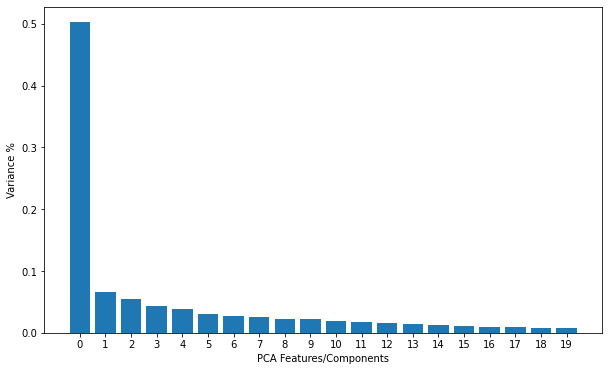

In [120]:
# Create PCA object with 20 components
pca_no_reg = PCA(n_components=20)

# creating table of our new transformed data
principalComponents_no_reg = pca_no_reg.fit_transform(no_reg_df_scale)

# Plot the explained variances
# list of features for the x-axis
features = range(pca_no_reg.n_components_)
plt.figure(figsize=(10, 6))
plt.bar(features, pca_no_reg.explained_variance_ratio_, color='C0')
plt.xlabel('PCA Features/Components')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

In [122]:
# determing the optimal number of clusters using the elbow method
sum_of_squared_distances = []

# creating range of values to use
K = range(1,15)

# for loop to iterate through k values to find the inertias
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(no_reg_df_scale)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


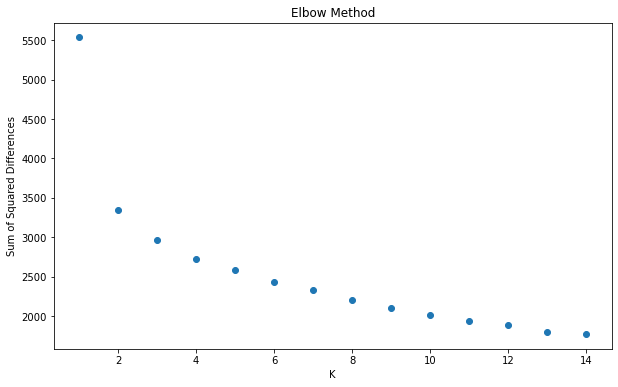

In [123]:
# plotting the inertia/sum of squared differences to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, sum_of_squared_distances)
plt.ylabel('Sum of Squared Differences')
plt.xlabel('K')
plt.title('Elbow Method')
plt.show()

From the elbow method plot, we find that K is optimal at around 2 - 4 (open to interpretation).

## Silhouette Method

In [124]:
# determing the optimal number of clusters using the elbow method
s_score = []

# creating range of values to use to find silhouette scores
K = range(2,15)

# for loop to iterate through k values and to calculate silhouette scores
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(no_reg_df_scale)
    prediction = km.predict(no_reg_df_scale)

    # calculating silhouette scores and adding to s_score list
    silhouette = silhouette_score(no_reg_df_scale,prediction)
    s_score.append(silhouette)

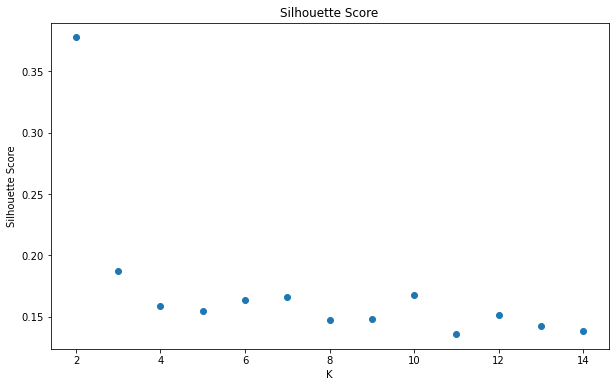

In [125]:
# plotting the silhouette coefficient vs. number of clusters to find the optimal number of clusters (k)
plt.figure(figsize=(10, 6))
plt.scatter(K, s_score)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.title('Silhouette Score')
plt.show()

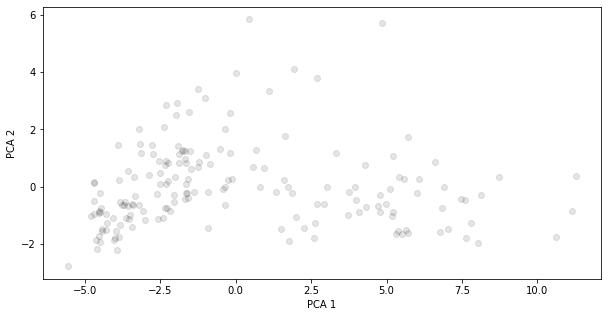

In [126]:
# visualizing the first two components to inspect if there are any clusters
plt.figure(figsize=(10,5))
plt.scatter(PCA_components_no_reg[0], PCA_components_no_reg[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Using the silhouette and inertia score as metrics to evaluate our clustering methods, we can see that the best number of clusters is 2. As we increase the number of clusters, the separation and distinction between these groups become worse. Additionally, performing PCA, we can see that the using the first principal component, about 50% of the variance is explained and there is a huge dropoff from there. The rest of the principal components explain more or less the remaining variance distributed evenly. Looking at the plot of PCA 1 vs. PCA 2 we can see that there are two clear distinct clusters, which agree with the silhouette and inertia metrics. If we are looking to determine clear and distinct clusters, 2 is best. Three clusters is also appropriate, as seen in earlier parts of this analysis.